In [1]:
from pprint import pprint
from base import *

## Check STORAGE and CUSTOM_SCR in setting.py

In [2]:
!cat ./setting.py

# STORAGE = '../storage'
# CUSTOM_SCR = 'custom'

# for example
STORAGE = '../storage_example'
CUSTOM_SCR = 'custom_example'


## Read log files

In [3]:
!python3 load_storage.py

INFO:load_storage.py:<module>:save cache files in ../storage_example/cache
  0%|                                                     | 0/4 [00:00<?, ?it/s]DEBUG:load_storage.py:save_dataset:log_path ../storage_example/a1_b1.txt
size     4

DEBUG:load_storage.py:save_dataset:dataset save as ../storage_example/cache/a1_b1.pickle
DEBUG:load_storage.py:save_dataset:log_path ../storage_example/a1_b2.txt
size     3

DEBUG:load_storage.py:save_dataset:dataset save as ../storage_example/cache/a1_b2.pickle
DEBUG:load_storage.py:save_dataset:log_path ../storage_example/a2_b1.txt
size     2

DEBUG:load_storage.py:save_dataset:dataset save as ../storage_example/cache/a2_b1.pickle
DEBUG:load_storage.py:save_dataset:log_path ../storage_example/a2_b2.txt
size     3

DEBUG:load_storage.py:save_dataset:dataset save as ../storage_example/cache/a2_b2.pickle
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 2471.96it/s]
INFO:load_storage.py:save_database:size is 4


## Database

In [4]:
root = '../storage_example/cache'
database = Database(root)

### Check Parameters

In [5]:
database.params

{Param(a='a1', b='b1'),
 Param(a='a1', b='b2'),
 Param(a='a2', b='b1'),
 Param(a='a2', b='b2')}

### Interactive (automatic) dataset loading

In [6]:
print(database)

======== load datsets : size 0 ====================


In [7]:
# load (a, b) = (a1, b1) dataset
database['a1', 'b1']
print(database)

======== load datsets : size 1 ====================

dataset 0
   log_path ../storage_example/a1_b1.txt
	size     4
	


In [8]:
# load (a, b) = (a1, b2) dataset
database[Param(a='a1', b='b2')]
print(database)

======== load datsets : size 2 ====================

dataset 0
   log_path ../storage_example/a1_b1.txt
	size     4
	

dataset 1
   log_path ../storage_example/a1_b2.txt
	size     3
	


### Free loaded dataset

In [9]:
database.free()
print(database)

======== load datsets : size 0 ====================


### Extruct database

In [10]:
# extract (a, b) = ('a1', 'b1') data
sub_database = database.sub(a='a1', b='b1')
print(sub_database)

======== load datsets : size 1 ====================

dataset 0
   log_path ../storage_example/a1_b1.txt
	size     4
	


In [11]:
# show detail
sub_database.datas['a1', 'b1']

Dataset("../storage_example/a1_b1.txt")

In [12]:
# show more detail
sub_database.datas['a1', 'b1'].datas

[{'time': 1.0, 'value': 2.0},
 {'time': 3.0, 'value': 9.0},
 {'time': 10.0, 'value': 10.0},
 {'time': 12.0, 'value': 15.0}]

### Plot

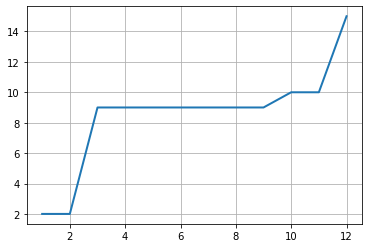

In [13]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b1',
)
ax.grid('--')

In [14]:
# add line
sub_database = database.sub(a='a1', b='b2')
pprint(sub_database.datas['a1', 'b2'].datas)

sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='a1-b2',
    fig=fig, ax=ax
)

ax.legend()
ax.set_xlabel('time')
ax.set_ylabel('value')

[{'time': 3.0, 'value': 0.0},
 {'time': 4.0, 'value': 1.0},
 {'time': 10.0, 'value': 2.0}]


Text(3.1999999999999993, 0.5, 'value')

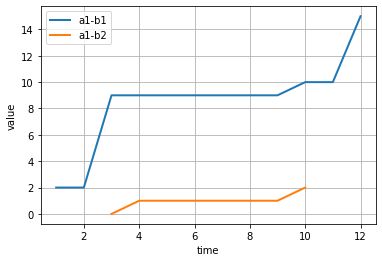

In [15]:
fig

### Extruct multi database

In [16]:
sub_database = database.sub(a='a1')
print(sub_database)

======== load datsets : size 2 ====================

dataset 0
   log_path ../storage_example/a1_b1.txt
	size     4
	

dataset 1
   log_path ../storage_example/a1_b2.txt
	size     3
	


### meanplot

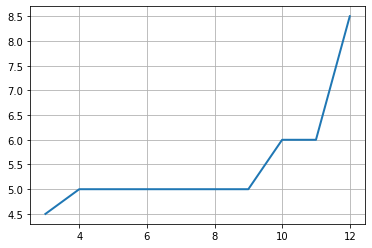

In [17]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='mean',
    plot_type='meanplot',
)
ax.grid('--')

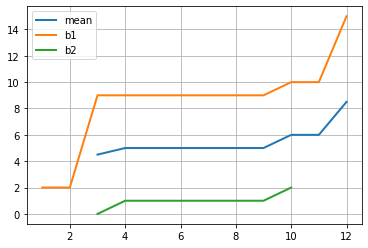

In [18]:
fig, ax = sub_database.sub(b='b1').lineplot(
    xitem='time',
    yitem='value',
    label='b1',
    fig=fig, ax=ax,
)
fig, ax = sub_database.sub(b='b2').lineplot(
    xitem='time',
    yitem='value',
    label='b2',
    fig=fig, ax=ax,
)
ax.legend()
fig

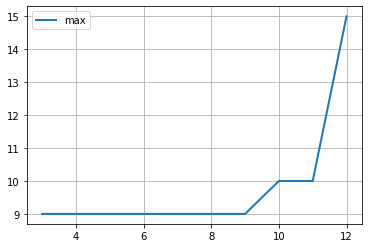

In [19]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='max',
    plot_type='maxplot',
)
ax.grid('--')
ax.legend()

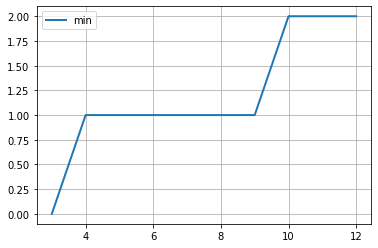

In [20]:
fig, ax = sub_database.lineplot(
    xitem='time',
    yitem='value',
    label='min',
    plot_type='minplot',
)
ax.grid('--')
ax.legend()